Эту версию пришлось делать для аспирантуры

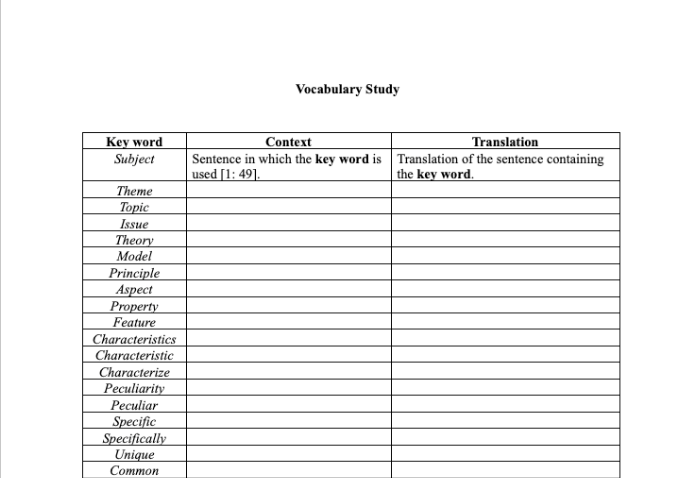

Ручная предобработка такого документа и постобработка все равно необходимы
1. конвертация в txt - список словарных слов
2. " / " -> "/"
3. удаление (v/n), (=as)
4. Поиск статей отвечающих требованиям

In [ ]:
import pandas as pd
from googletrans import Translator
from utils import read_txt

In [50]:
words = read_txt("source/A24-000_Name_Vocabulary_study.txt")

In [51]:
examples = {}

In [52]:
from pypdf import PdfReader

In [53]:
articles = [
    "articles/Machine Learning The High Interest Credit Card of Technical Debt.pdf",
    "articles/Attention is all you need.pdf",
    "articles/QUEACO.pdf",
    "articles/Query Rewrite for Null and Low Search.pdf",
    "articles/NER.pdf",
    "articles/NER_LENOVO.pdf",
    "articles/query rewriting.pdf",
    "articles/Auto sklearn.pdf"
]

In [54]:
# 'view': 'after reviewing the related work in section 2, we provide an overview of our problem setting and model design in section 3.[7:1]',

In [55]:
import re

In [56]:
for i, article in enumerate(articles):
    print(f"processing {article}...")
    reader = PdfReader(article)

    for word in words:
        if word in examples:
            continue
        for word_variance in word.split("/"):
            word_pattern = r'\b' + re.escape(word_variance) + r'\b'
            for page in reader.pages:
                for sentence in page.extract_text().lower().replace("\n", " ").split("."):
                    if re.search(word_pattern, sentence):
                        examples[word_variance] = sentence.strip() + "." + f"[{i+1}:{page.page_number+1}]"
                        print(f"found {word_variance} ", end='\r')
                        break
                else:
                    continue
                break

processing articles/Machine Learning The High Interest Credit Card of Technical Debt.pdf...
processing articles/Attention is all you need.pdf...
processing articles/QUEACO.pdf...
processing articles/Query Rewrite for Null and Low Search.pdf...
processing articles/NER.pdf...
processing articles/NER_LENOVO.pdf...
processing articles/query rewriting.pdf...
processing articles/Auto sklearn.pdf...


In [57]:
import translators as ts

In [58]:
from tqdm import tqdm

In [59]:
examples = {word : example.capitalize() for word, example in tqdm(examples.items(), position=0)}

100%|██████████| 213/213 [00:00<00:00, 990450.94it/s]


In [60]:
def translate(text):
    return ts.translate_text(
        text, 
        from_language='en', 
        to_language='ru', 
        translator='yandex',
        timeout=30, 
        sleep_seconds=1, 
        update_session_after_freq=10)

translations = {word : translate(example.split(".")[0]) for word, example in tqdm(examples.items(), position=0)}

100%|██████████| 213/213 [03:50<00:00,  1.08s/it]


In [61]:
vocabulary = pd.DataFrame({"Key word": words,
                           "Context": [examples.get(w, "-") for w in words],
                           "Translation": [translations.get(w, "-") for w in words], 
                           })
vocabulary.head()

,Key word,Context,Translation
0,subject,This task presents specific challenges: the ou...,Эта задача сопряжена со специфическими труднос...
1,theme,-,-
2,topic,"For example, rather than allowing a semantic m...","Например, вместо того, чтобы позволять семанти..."
3,issue,"The above mitigation strategies may help, but ...",Вышеприведенные стратегии смягчения последстви...
4,theory,In: nips workshop on bayesian optimization in ...,В: семинар nips по байесовской оптимизации в т...


In [62]:
vocabulary.to_excel("output/vocabulary_full_new.xlsx")